## TP 2 : Linear Regression      (SD TSIA 204)
### Author : Eliot Guez

###  **Question 1** 
For the first question, we load a standard dataset from **sklearn.datasets** named **fetch_california_housing**. This dataset has only p = 8 variables.

**(a)** Estimate the coefficients with the expression of the normal equaitons seen in class. Code two functions to compute the MSE and the R2 coefficient and compare them with the version of sklearn for the train and the test sets.

In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
california = datasets.fetch_california_housing()
X = california.data
y = california.target
## Get the test set and train set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

The normal equation is given by : $(X^TX)\hat{\theta} = X^Ty \\$ donc 
$\hat{\theta} = (X^TX)^{-1}X^Ty$

In [3]:
# solve for theta
theta = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
print(theta)

[ 5.21269386e-01  1.57436860e-02 -1.95003552e-01  9.89609422e-01
  1.00566134e-05 -4.30556622e-03 -6.14092262e-02 -1.47447074e-02]


In [4]:
## function for mse and R2
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)
def R2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

In [5]:
## calculate mse and R2
print( 'calculate mse and R2 with own function on the test set')
y_hat = np.dot(X_test, theta)
print( 'mse is', mse(y_test, y_hat))
print('the R2_score is ', R2(y_test, y_hat))


print( 'calculate mse and R2 with own function on the train set')
y_hat = np.dot(X_train, theta)
print( 'mse is', mse(y_train, y_hat))
print('the R2_score is ', R2(y_train, y_hat))


calculate mse and R2 with own function on the test set
mse is 0.6159307296888297
the R2_score is  0.5345206301199513
calculate mse and R2 with own function on the train set
mse is 0.6018796196765103
the R2_score is  0.5489223476267141


In [6]:
## compute R2 and MSE using the version 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print( 'calculate mse and R2 with sklearn function on the test set')
y_hat = np.dot(X_test, theta)
print( 'mse is', mean_squared_error(y_test, y_hat))
print('the R2_score is ', r2_score(y_test, y_hat))

print( 'calculate mse and R2 with sklearn function on the train set')
y_hat = np.dot(X_train, theta)
print( 'mse is', mean_squared_error(y_train, y_hat))
print('the R2_score is ', r2_score(y_train, y_hat))


calculate mse and R2 with sklearn function on the test set
mse is 0.6159307296888297
the R2_score is  0.5345206301199513
calculate mse and R2 with sklearn function on the train set
mse is 0.6018796196765103
the R2_score is  0.5489223476267141


Our fonctions compute the same results as the sklearn ones.

**(b)** Finally, give the confidence intervals at level 99% for all the coefficients coding the expression for the CI seen in session 3.

In [7]:
## Function to compute the confidence interval at level 99%

from scipy import stats

def confidence_interval(X, y, y_hat, theta, alpha = 0.01):

    n,p = X.shape
    sigma = np.sqrt(np.sum((y - y_hat)**2) / (n - p - 1))

    XTX_inv = np.linalg.inv(np.dot(X.T, X))

    diag = np.diag(XTX_inv)
    ci = np.zeros((p, 2))

    t = np.abs(stats.t.ppf(alpha/2, n - p - 1))
    
    for i in range(p):
        ci[i, 0] = theta[i] -  t*sigma * np.sqrt(diag[i])
        ci[i, 1] = theta[i] +  t*sigma * np.sqrt(diag[i])
    return ci

In [8]:
## compute the confidence interval at level 99% for the test set
print('compute the confidence interval at level 99% for the test set')
y_hat = np.dot(X_test, theta)
ci = confidence_interval(X_test, y_test, y_hat, theta)
print( 'the confidence interval is', ci)
print('theta is :',  theta)

compute the confidence interval at level 99% for the test set
the confidence interval is [[ 4.98703630e-01  5.43835143e-01]
 [ 1.32979224e-02  1.81894497e-02]
 [-2.27968124e-01 -1.62038981e-01]
 [ 8.46693639e-01  1.13252520e+00]
 [-1.77006054e-05  3.78138321e-05]
 [-2.19852590e-02  1.33741265e-02]
 [-8.02191605e-02 -4.25992920e-02]
 [-2.07345552e-02 -8.75485968e-03]]
theta is : [ 5.21269386e-01  1.57436860e-02 -1.95003552e-01  9.89609422e-01
  1.00566134e-05 -4.30556622e-03 -6.14092262e-02 -1.47447074e-02]


###  **Question 2** 
For the rest of the TP, we use the dataset in eCampus data. Load and preprocess the data:

**(a)** Separate the data in train and test sets: save one fourth of the data as testing train_test_split from sklearn.model_selection with the random seed set to 0 and standardize both the training and testing sets using the fit_transform and transform functions in sklearn.preprocessing.StandardScaler.

In [9]:
data = pd.read_csv('data.csv', header = None)

data = np.array(data)
X,y = data[:, :-1], data[:, -1]
## Get the test set and train set 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**(b)** Fit a regular OLS.

In [10]:
# fit a regular OS
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)

Y_pred = ols.predict(X_test)
print('the mse of the regular OS for the test set is', mean_squared_error(y_test, Y_pred))
print('the R2_score of the regular OS for the test set is ', r2_score(y_test, Y_pred))

# Let's compare with the training set
Y_pred = ols.predict(X_train)
print('the mse of the regular OS for the trained set is ', mean_squared_error(y_train, Y_pred))
print('the R2_score of the regular OS for the trained set is ', r2_score(y_train, Y_pred))

the mse of the regular OS for the test set is 3929.1646322964575
the R2_score of the regular OS for the test set is  0.20853398877025475
the mse of the regular OS for the trained set is  2808.7074448098706
the R2_score of the regular OS for the trained set is  0.5508564745982538


The results are clearly better with the training since  the R2 coeff is closer to 1 and the MSE is smaller for the training set.

###  **Question 3 Variable Selection** 
Program the method of forward variable selection based on hypothesis tests for regression coefficients. This method starts from an empty set of variables S and at each iteration selects one variable relevant for predicting y and includes it in the set S. It runs until a halting condition is met. The coding process is as follows:


**(a)** Develop a function that, given a dataset $X \in R^{n\cdot p}$ and y, fits p linear regression models, each using only feature $X_j$ to predict y. For each model, conduct a test of no effect, as discussed in session 3, and compute the p-value of the test. This function should return the coefficient with the smallest p-value. Explain the significance of the p-value in this context.

In [11]:
#calculate the p-value for each feature

def calc_p_value(X,y):
    n,p = X.shape
    p_values = np.zeros(p)
    for j in range(p): 
        X_j = np.reshape(X[:,j],(n,1))
        ols = LinearRegression()
        ols.fit(X_j,y)
        y_hat = ols.predict(X_j)
        sigma = np.sqrt(np.sum((y - y_hat)**2) / (n - 2))
        t_statistics = ols.coef_[0] / (sigma *np.sqrt(np.diag(np.linalg.inv(np.dot(X_j.T, X_j)))))
        p_values[j] = 2 * (1 - stats.t.cdf(np.abs(t_statistics), n - 2))
    return np.argmin(p_values), np.min(p_values)



The p_value is the probability of obtaining a result at least as extreme as the one observed, under the null hypothesis. So the lower the p_value, the more significant the variable.

**(b)** Apply the function iteratively. At each iteration, select the feature Xf with the smallest p-value and:  
i. Include it in the set S.  
ii. Remove it from X.  
iii. Subtract from y the residuals of the model fit with feature Xf . Elaborate on the reason for subtracting the residuals  

**(c)** Add a halting condition to the algorithm: Stop adding features to the set S when the p-value exceeds 0.05. Plot the p-values for every coefficient for the first 5 iterations (all in the same plot).

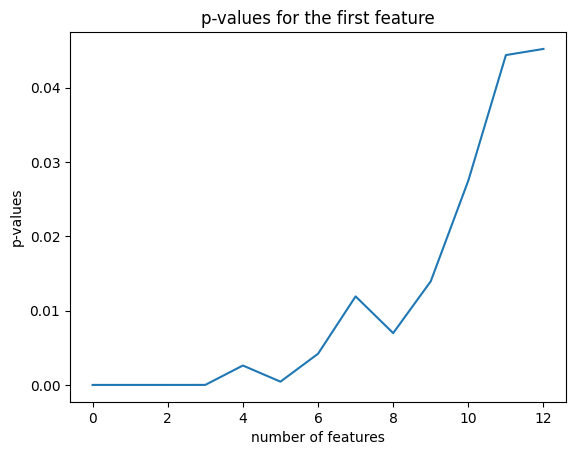

In [12]:
def forward_selection(X,y):
    n,p = X.shape
    selected_features = []
    p_value = 0 
    p_values = []
    ols = LinearRegression()
    while X.shape[1] > 0 and p_value < 0.05: 
        j, p_value = calc_p_value(X,y)
        if p_value < 0.05:                
            selected_features.append(j)
            X_j = np.reshape(X[:,j],(n,1))
            X = np.delete(X, j, axis = 1)
            ols.fit(X_j,y)
            y_hat = ols.predict(X_j)
            y = y - y_hat
            p_values.append(p_value)
    return selected_features, p_values, X[:,selected_features],y

## plot the p-values
selected_features, p_values,_,_ = forward_selection(X_train, y_train)
plt.plot(p_values)
plt.xlabel('number of features')
plt.ylabel('p-values')
plt.title('p-values for the first feature')
plt.show()

In [13]:
print(np.cov(X_train[:, -1], X_train[:, 122]))

[[ 1.0030303  -0.06213473]
 [-0.06213473  1.0030303 ]]


###  **Question 4 Extension** 
4) Run ridge regression using scikit-learn on the training set. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between $10^{-1}$ and $10^6$
. Display two
subplots at the end:  
**a)** The first subplot should show the evolution of the coefficients for each different value of the penalty parameter.  
**b)** The second subplot should display the evolution of the R-squared coefficient at each of the 30 iterations.

In [14]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def regression(model_class, alphas, X_train, y_train):
    r2_scores = []
    coeffs = []
    for alpha in alphas:
        model = model_class(alpha)
        model.fit(X_train, y_train)
        r2_scores.append(r2_score(y_train, model.predict(X_train)))
        coeffs.append(model.coef_)
    ##plot 
    plt.figure(figsize=(10, 8))
    ## subplots coeffs
    plt.subplot(1, 2, 1)
    plt.plot(alphas, coeffs, label='train')
    plt.xlabel('Penalty parameter alpha')
    plt.ylabel('Coefficients')
    plt.xscale('log')
    plt.title('Coefficients on train set')

    ## subplots mse
    plt.subplot(1, 2, 2)
    plt.plot(alphas, r2_scores, label='train')
    plt.xscale('log')
    plt.xlabel('Penalty parameter alpha')
    plt.ylabel('R2_score')
    plt.title('R2_score on train set')
    
    plt.show()
    return r2_scores, coeffs

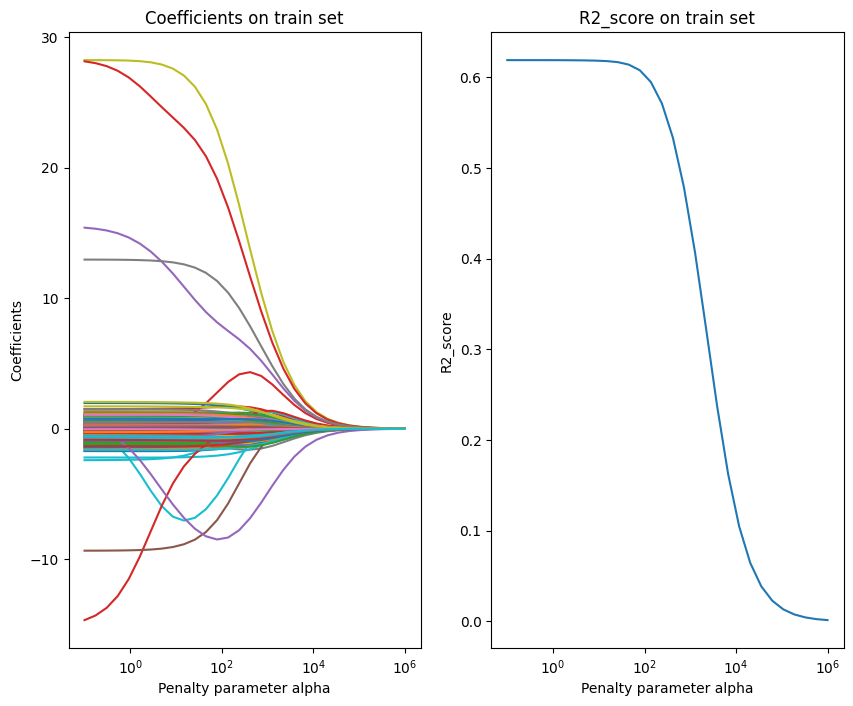

In [15]:
reg = regression(Ridge, np.logspace(-1, 6, 30), X_train, y_train)

5) Run the code for Lasso as explained in Point 4. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^2$.


c:\Users\eliot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+05, tolerance: 2.070e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\eliot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.162e+04, tolerance: 2.070e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\eliot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

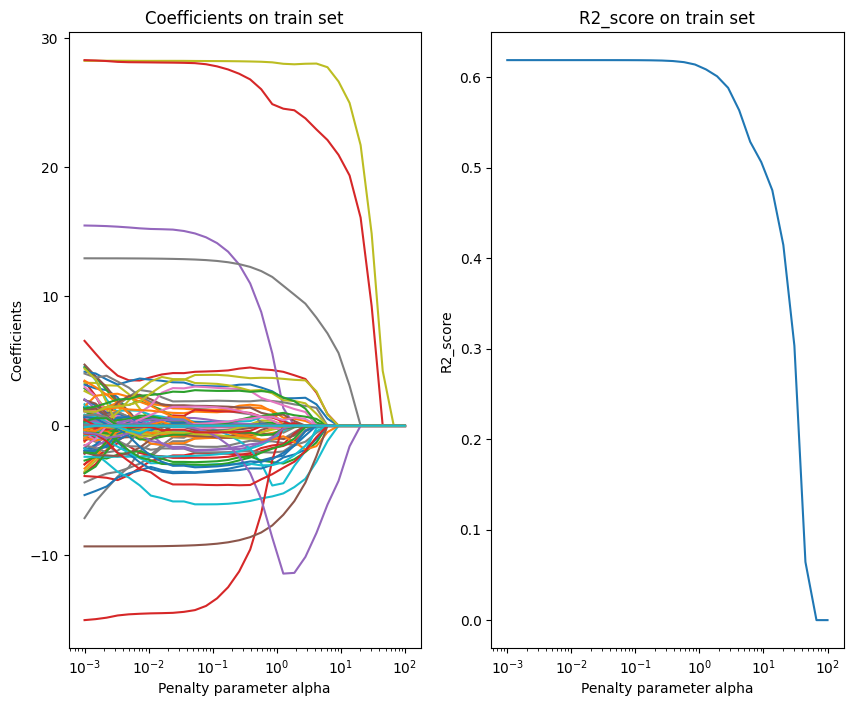

In [16]:
reg = regression(Lasso, np.logspace(-3, 2, 30), X_train, y_train)

6) Run the code for ElasticNet as explained in Point 4. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^2$.

c:\Users\eliot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.096e+05, tolerance: 2.070e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\eliot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.534e+05, tolerance: 2.070e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\eliot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

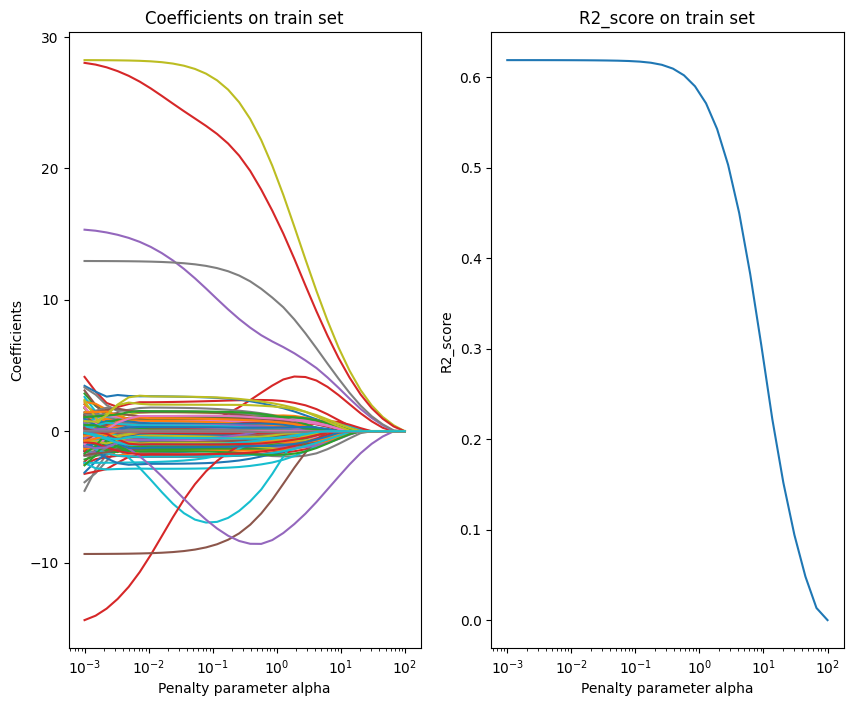

In [17]:
reg = regression(ElasticNet, np.logspace(-3, 2, 30), X_train, y_train)

The lower alpha,, the higher the R2_score.

###  **Question 7 PCR** 
7) Compute the singular value decomposition of the covariance matrix. For consistency in the notation use $U, s, V = SVD(X^TX)$ .  
**a)** Plot a heatmap of the covariance matrix  
**b)** Compute the PCA for the data using the SVD.  
**c)** Plot the amount of variance explained by the first k components for $k \in 2..p$. How many variables do we need to explain more than 90% of the variance?  
**d)** Plot the projected data with k = 2 using as color the value of y and interpret the plot.  
**e)** Plot the the two first principal directions.  
**f)** Run OLS on the projected data (PCR) using k components for k ă 50. Select the k that returns the best score of the OLS model and plot the evolution of the scores with k.

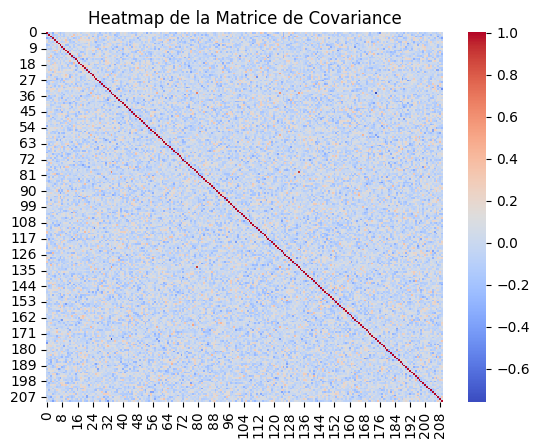

In [18]:
## a- Plot a heatmap of the covariance matrix  
import seaborn as sns
sns.heatmap(np.cov(X_train.T), cmap='coolwarm')
plt.title('Heatmap de la Matrice de Covariance')
plt.show()

In [19]:
## b - compute the pca for the data using the svd
X_centered = X_train - X_train.mean(axis=0)
U, s, v = np.linalg.svd(X_centered.T @ X_centered / (X_centered.shape[0]-1), full_matrices=True)
V_reduced = v.T[:, :49]
X_pca = X_centered @ V_reduced

We need 40 variables to explain more than 90% of the variance
0.904203271249629


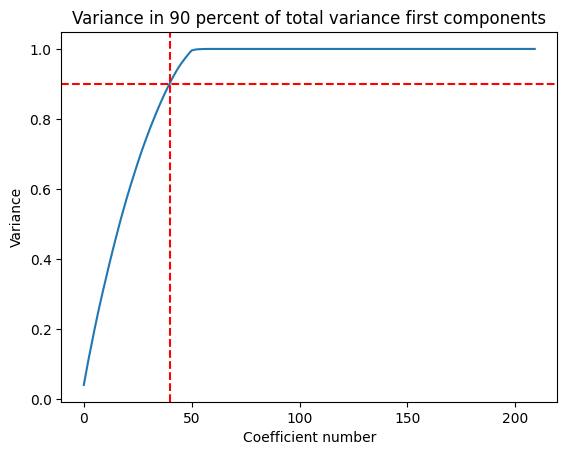

In [20]:
## c - Plot the amount of variance explained by the first k components for k in [2,p]. How many variables do we need to explain more than 90% of the variance?  

cumulative_var= 0
total_var = s.T @ s
var_list = []

for var in s :
    cumulative_var += var**2
    var_list.append(cumulative_var / total_var)

seuil = np.argmin(np.abs(np.array(var_list) - 0.9))
plt.plot(var_list)
plt.title('Variance in 90 percent of total variance first components')
plt.xlabel('Coefficient number')
plt.axvline(x=seuil, color='r', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.ylabel('Variance')

print('We need', seuil, 'variables to explain more than 90% of the variance')
print(var_list[seuil])

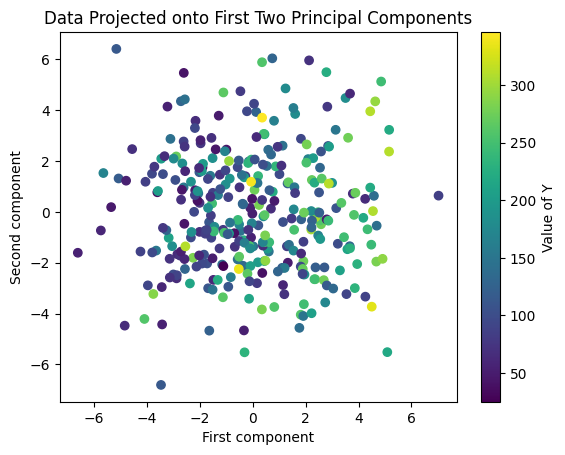

In [21]:
## d - Plot the projected data with k = 2 using as color the value of y and interpret the plot.
k = 2 
V_reduced = v.T[:, :k]
X_pca2 = X_train @ V_reduced
plt.scatter(X_pca2[:,0], X_pca2[:,1], c = y_train)
plt.title('Projection of the data with k = 2')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.colorbar(label='Value of Y')
plt.gca
plt.title('Data Projected onto First Two Principal Components')
plt.show()


We can see that the lower the first component, the higher the value of y.   
The second component is not very significant.

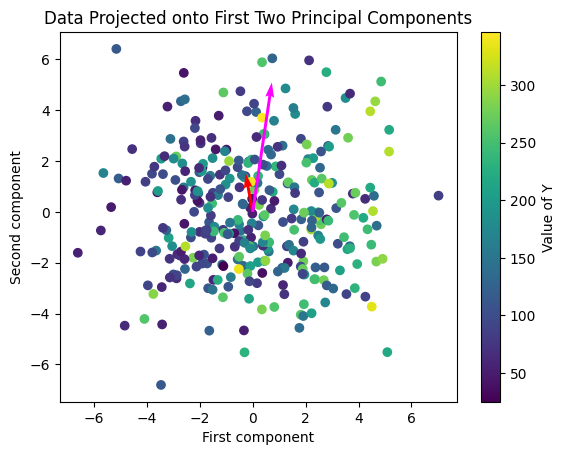

In [22]:
## e -  Plot the the two first principal directions. 


plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y_train)
plt.colorbar(label='Value of Y')
origin = [0, 0] 
plt.quiver(*origin, V_reduced[0,0], V_reduced[0,1], color='r', scale=0.3)
plt.quiver(*origin, V_reduced[1,0], V_reduced[1,1], color='magenta', scale=0.3)

plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('Data Projected onto First Two Principal Components')
plt.show()


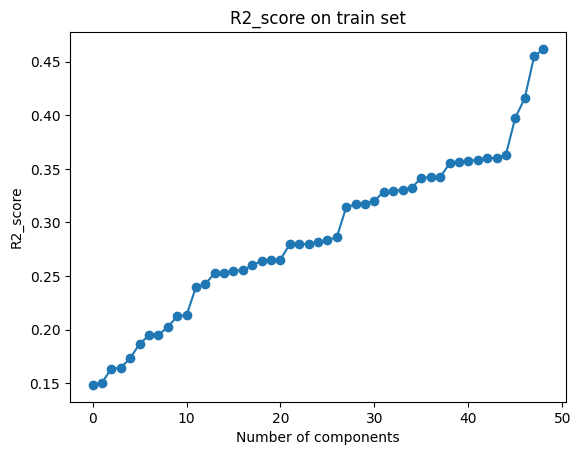

In [23]:
## f -  Run OLS on the projected data (PCR) using k components for k < 50. Select the k that returns the best score of the OLS model and plot the evolution of the scores with k.
k = 50 
r2_scores = []
for i in range(1, k):
    ols = LinearRegression()
    ols.fit(X_pca[:, :i], y_train)
    Y_pred = ols.predict(X_pca[:, :i])
    r2_scores.append(r2_score(y_train, Y_pred))
best_k = np.argmax(r2_scores) + 1
plt.plot(r2_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('R2_score')
plt.title('R2_score on train set')
plt.show()


###  **Question 8 Comparison of the models**

**8) Summarize the results of the models and elaborate in their main characteristics. Plot all the training and testing errors for all the models considered and elaborate on the results.** 

c:\Users\eliot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+05, tolerance: 2.070e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\eliot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.162e+04, tolerance: 2.070e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\eliot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

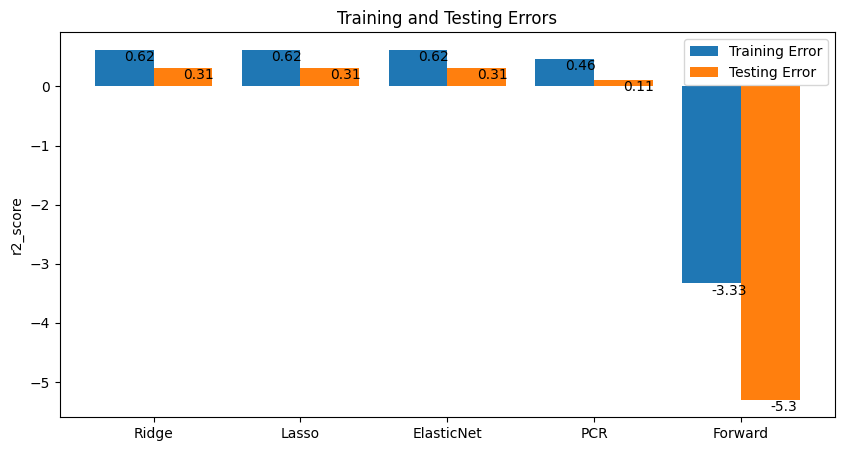

In [24]:
score = {}

## ridge 
penalty = np.logspace(-1, 6, 30)
r2_scores_train = []
r2_scores_test = []
for alpha in penalty:
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)
    r2_scores_train.append(r2_score(y_train, ridge.predict(X_train)))
    r2_scores_test.append(r2_score(y_test, ridge.predict(X_test)))
score['Ridge'] = {}
score['Ridge']['train'] = max(r2_scores_train)
score['Ridge']['test'] = r2_scores_test[np.argmax(r2_scores_train)]

## lasso
penalty = np.logspace(-3, 2, 30)
r2_scores_train = []
r2_scores_test = []
for alpha in penalty:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    r2_scores_train.append(r2_score(y_train, lasso.predict(X_train)))
    r2_scores_test.append(r2_score(y_test, lasso.predict(X_test)))
score['Lasso'] = {}
score['Lasso']['train'] = max(r2_scores_train)
score['Lasso']['test'] = r2_scores_test[np.argmax(r2_scores_train)]

## elasticnet
penalty = np.logspace(-3, 2, 30)
r2_scores_train = []
r2_scores_test = []
for alpha in penalty:
    elasticnet = ElasticNet(alpha)
    elasticnet.fit(X_train, y_train)
    r2_scores_train.append(r2_score(y_train, elasticnet.predict(X_train)))
    r2_scores_test.append(r2_score(y_test, elasticnet.predict(X_test)))
score['ElasticNet'] = {}
score['ElasticNet']['train'] = max(r2_scores_train)
score['ElasticNet']['test'] = r2_scores_test[np.argmax(r2_scores_train)]


## forward variable selection
X_copy = X_train.copy()
y_copy = y_train.copy()

selected_features, p_values, X_reduced,y_pred = forward_selection(X_copy, y_copy)
y_pred = np.reshape(y_pred, (len(y_pred), 1))
score['Forward'] = {}
score['Forward']['train'] = r2_score(y_train, y_pred) 
score['Forward']['test'] = r2_score(y_test, y_pred[:len(y_test)])


## PCA
score['PCR'] = {}
# train
X_centered_train = X_train - np.mean(X_train, axis=0)

U, s, V = np.linalg.svd(X_centered_train.T @ X_centered_train)


X_pca_train = X_centered_train @ V.T[:,:49]

ols = LinearRegression()
ols.fit(X_pca_train, y_train)

y_pred_train = ols.predict(X_pca_train)

score['PCR']['train'] = r2_score(y_train, y_pred_train)

# test
X_centered_test = X_test - np.mean(X_test, axis=0)
X_pca_test = X_centered_test @ V.T[:,:49]

y_pred_test = ols.predict(X_pca_test)
score['PCR']['test'] = r2_score(y_test, y_pred_test)




# Create a list of train scores and test scores
train_scores = []
test_scores = []
model = ['Ridge', 'Lasso', 'ElasticNet', 'PCR', 'Forward']
for model_name in model :
    train_scores.append(score[model_name]['train'])
    test_scores.append(score[model_name]['test'])

plt.figure(figsize=(10, 5))
train_bars = plt.bar(np.arange(len(score)) - 0.2, train_scores, width=0.4, label='Training Error')
test_bars = plt.bar(np.arange(len(score)) + 0.2, test_scores, width=0.4, label='Testing Error')


for bar in train_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='top')  

for bar in test_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='top')  

plt.xticks(np.arange(len(model)), model)
plt.ylabel('r2_score')
plt.legend()
plt.title('Training and Testing Errors')
plt.show()


To sum up, here are the main characteristics and results of each model:

1. Ridge Regression:
   - This model introduce a a penalty term (L2 regularization) to the loss function. This shrinkage of the coefficients helps to reduce model complexity and prevent overfitting.
   - The model runs the code for 30 different values of the penalty parameter, which are on a logarithmic scale between 10^-1 and 10^6.
   - The best R2 coefficient is equal to the one of Lasso Regression and ElasticNet Regression.

2. Lasso Regression:
   - This model introduce a a penalty term (L1 regularization), which can lead to some coefficients being shrunk completely to zero. 
   - The model runs the code for 30 different values of the penalty parameter, which are on a logarithmic scale between 10^-3 and 10^2.
   - The best R2 coefficient is equal to the one of Ridge Regression and ElasticNet Regression.

3. ElasticNet Regression:
   - This model introduce a a penalty term (L1 regularization) and a penalty term (L2 regularization).
   - The model runs the code for 30 different values of the penalty parameter, which are on a logarithmic scale between 10^-3 and 10^2.
   - The best R2 coefficient is equal to the one of Ridge Regression and Lasso Regression.

4. Forward Variable Selection (FVS):
   - This model performs forward variable selection to select the most relevant features for prediction iteratively, stopping when the p-value exceeds 0.05.
   - The model plots the p-values for every coefficient for the first 5 iterations.
   - On the histogram we can see we have a problem since the r2 coefficient are negative, which that the y_pred and y_test aren't well calculated. Indeed I had trouble to understand what was y_pred and y_test in the function forward_variable_selection. 

5. Principal Component Regression (PCR):
   - This model performs Principal Component Analysis (PCA) using the SVD.
   - This model then performs Ordinary Least Squares (OLS) on the projected data obtained from PCA.
   - It runs OLS for different numbers of components (k) ranging from 1 to 50.
   - The results are not as good as the first 3 method especially for the testing set.
